<a href="https://www.kaggle.com/code/mrafraim/dl-day-6-optimizers?scriptVersionId=288732909" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Day 6: Optimizers 

Welcome to Day 6!  

### Today’s goals:
1. Understand **Gradient Descent intuition**  
2. Learn about **learning rate**  
3. Explore **weight update rules**  
4. Implement a **simple example in NumPy**  

Optimizers help the network learn by minimizing the loss function.

---

# Optimizer
 An **optimizer** is an algorithm that updates the model’s parameters (weights and biases) during training to minimize the loss function.

**Key points:**

* Controls step size and direction for parameter updates
* Can include momentum, adaptive learning rates, or other techniques to improve training

### **Examples of Optimizers**

Some commonly used optimizers in deep learning include:

* **SGD**: *Stochastic Gradient Descent*
* **SGD with Momentum**: *Stochastic Gradient Descent with Momentum*
* **AdaGrad**: *Adaptive Gradient Algorithm*
* **RMSProp**: *Root Mean Square Propagation*
* **Adam**: *Adaptive Moment Estimation*

In this notebook, we will focus only on Gradient Descent (SGD) to understand the core concepts before exploring advanced optimizers.

# Gradient Descent

Gradient Descent is an **iterative optimization algorithm** that minimizes a loss (or cost) function by moving in the direction opposite to the gradient of the function with respect to the parameters (weights).

* “Gradient” → refers to the slope or derivative of the loss function.
* “Descent” → refers to moving downhill to reduce the loss.

- The gradient points in the direction of steepest ascent 
- Moving in the opposite direction reduces the loss  

Suppose, you have a loss function, $L(w)$, which tells you how wrong your model is for a given weight $w$. The goal: find the weights that make the loss as small as possible (lowest point on the hill).


Mathematically:

$$
w = w - \eta \frac{\partial L}{\partial w}
$$

Where:
- $w$ = weight  
- $\eta$ = learning rate  
- $L$ = loss function  
- $\frac{\partial L}{\partial w}$ = gradient/ slope of the loss/ derivative of loss w.r.t weight  

Think of it like rolling a ball down a hill: the bottom is your minimum loss.


### Example: Minimizing $L(w) = (w-3)^2$

1. Loss function:  

$$
L(w) = (w-3)^2
$$

2. Gradient:  

$$
\frac{dL}{dw} = 2(w-3)
$$

3. Choose initial weight $w_0 = 0$ and learning rate $\eta = 0.1$  

4. Iterative updates:

- Step 1:  

$$
w_1 = w_0 - \eta \cdot \frac{dL}{dw}\Big|_{w_0} = 0 - 0.1 \cdot 2(0-3) = 0 + 0.6 = 0.6
$$

- Step 2:  

$$
w_2 = w_1 - 0.1 \cdot 2(0.6-3) = 0.6 - 0.1 \cdot (-4.8) = 0.6 + 0.48 = 1.08
$$

- Step 3:  

$$
w_3 = 1.08 - 0.1 \cdot 2(1.08-3) = 1.08 + 0.384 = 1.464
$$

> Repeating this process gradually moves $w$ towards the minimum $w^* = 3$.


**Takeaway:**  
Gradient Descent **iteratively follows the negative slope** of the loss function until it reaches the minimum, adjusting weights step by step.

### keypoints

* Iterative → you don’t get the minimum in one step
* Learning rate $\eta$ → too big → overshoot, too small → slow
* Gradient tells you how to move each step

# Learning Rate 

The learning rate ($\eta$) is a hyperparameter that controls the size of each step during Gradient Descent updates. It determines how quickly or slowly the model adjusts its weights and biases to minimize the loss.


### Gradient Descent Update Rules

For a weight $w$:

$$
w := w - \eta \frac{\partial L}{\partial w}
$$

For a bias $b$:

$$
b := b - \eta \frac{\partial L}{\partial b}
$$

Where:

- $\frac{\partial L}{\partial w}$ = gradient of the loss w.r.t the weight  
- $\frac{\partial L}{\partial b}$ = gradient of the loss w.r.t the bias  
- $\eta$ = learning rate  

**Intuition:**  
- Gradient points in the direction of steepest increase in loss  
- Moving opposite the gradient reduces the loss  
- Learning rate scales how big a move you take in that direction  

### Choosing the Learning Rate

- **Too small** ($\eta \ll 1$):  
  - Tiny steps → very slow convergence  
- **Too large** ($\eta \gg 1$):  
  - Overshoot minimum → possible divergence or oscillation  
- **Just right**: smooth, efficient descent to the minimum  


### Example: Weight Update

Suppose:

- Loss function: $L(w) = (w-3)^2$  
- Gradient: $\frac{dL}{dw} = 2(w-3)$  
- Initial weight: $w_0 = 0$  
- Learning rate: $\eta = 0.1$

#### Step 1:

$$
w_1 = w_0 - \eta \cdot \frac{dL}{dw}\Big|_{w_0} = 0 - 0.1 \cdot 2(0-3) = 0 + 0.6 = 0.6
$$

#### Step 2:

$$
w_2 = w_1 - 0.1 \cdot 2(0.6-3) = 0.6 - 0.1 \cdot (-4.8) = 0.6 + 0.48 = 1.08
$$

#### Step 3:

$$
w_3 = 1.08 - 0.1 \cdot 2(1.08-3) = 1.08 + 0.384 = 1.464
$$

> Repeating this process gradually moves $w$ toward the minimum $w^* = 3$.


### Keypoints

- Learning rate controls speed of learning  
- Proper tuning is critical: too small = slow, too large = unstable  
- Every step uses the gradient scaled by the learning rate to adjust weights and biases

# Example: Single Neuron 
### Neuron Output
A single neuron with input $x$, weight $w$, and bias $b$:

$$
\hat{y} = w \cdot x + b
$$

Where $\hat{y}$ is the predicted output.

### Loss Function (MSE)
For true target $y$, the Mean Squared Error (MSE) loss is:

$$
L = (\hat{y} - y)^2
$$

- Measures how far the prediction is from the true value.  


### Gradients

The gradients tell us how to adjust $w$ and $b$ to reduce the loss:

- Gradient w.r.t weight $w$:

$$
\frac{\partial L}{\partial w} = 2 (\hat{y} - y) \cdot x
$$

- Gradient w.r.t bias $b$:

$$
\frac{\partial L}{\partial b} = 2 (\hat{y} - y)
$$

**Intuition:**  
- If prediction $\hat{y}$ > target $y$, gradients are positive → reduce $w$ and $b$  
- If prediction $\hat{y}$ < target $y$, gradients are negative → increase $w$ and $b$  


###  Weight & Bias Update Rule

Using a learning rate $\eta$:

$$
w := w - \eta \frac{\partial L}{\partial w}
$$

$$
b := b - \eta \frac{\partial L}{\partial b}
$$

> Repeat iteratively to minimize the loss and make the neuron predict accurately.


# Gradient Descent Step (Code)

In [1]:
# Simple example
x = 2.0
y_true = 4.0
w = 0.5
b = 0.1
learning_rate = 0.1

# Forward pass
y_pred = w * x + b
loss = (y_pred - y_true)**2

# Gradients
dw = 2 * (y_pred - y_true) * x
db = 2 * (y_pred - y_true)

# Update weights
w -= learning_rate * dw
b -= learning_rate * db

print("Updated weight:", w)
print("Updated bias:", b)
print("Loss after update:", (w*x + b - y_true)**2)


Updated weight: 1.66
Updated bias: 0.6799999999999999
Loss after update: 0.0


# Gradient Descent Iterations (Code)

### Example 1

Final weight: 1.66
Final bias: 0.6799999999999999
Final loss: 0.0


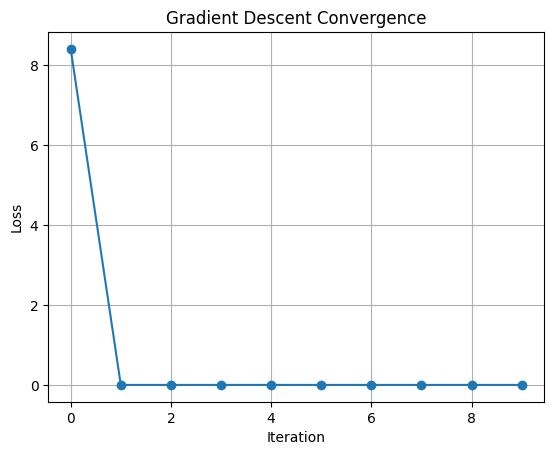

In [2]:
# Input and target
x = 2.0
y_true = 4.0
w = 0.5
b = 0.1
learning_rate = 0.1

# List to store losses
losses = []

# Gradient descent loop
for i in range(10):
    y_pred = w * x + b
    loss = (y_pred - y_true)**2
    losses.append(loss)
    
    # Gradients
    dw = 2 * (y_pred - y_true) * x
    db = 2 * (y_pred - y_true)
    
    # Update
    w -= learning_rate * dw
    b -= learning_rate * db

print("Final weight:", w)
print("Final bias:", b)
print("Final loss:", losses[-1])

# Visualize loss
import matplotlib.pyplot as plt
plt.plot(losses, marker='o')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Gradient Descent Convergence")
plt.grid(True)
plt.show()


After running gradient descent, the weight and bias have adjusted to w = 1.66 and b = 0.68, producing a final loss of 0.0.
This means the neuron now predicts the target perfectly, as the loss has been completely minimized.
The gradient descent successfully converged to the optimal parameters in just a few iterations.

### Example 2

Final weight: 1.998046875
Final bias: 0.9990234375
Final loss: 9.5367431640625e-05


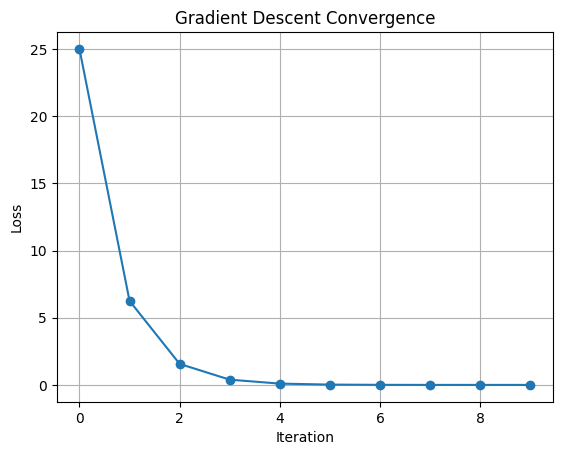

In [3]:
# Input and target
x = 2.0
y_true = 5.0

# Initialize weight and bias far from solution
w, b = 0.0, 0.0

# Learning rate (moderate for smooth convergence)
learning_rate = 0.05

# List to store losses
losses = []

# Gradient descent loop
for i in range(10):
    y_pred = w * x + b
    loss = (y_pred - y_true)**2
    losses.append(loss)
    
    # Gradients
    dw = 2 * (y_pred - y_true) * x
    db = 2 * (y_pred - y_true)
    
    # Update
    w -= learning_rate * dw
    b -= learning_rate * db

print("Final weight:", w)
print("Final bias:", b)
print("Final loss:", losses[-1])

# Visualize loss
import matplotlib.pyplot as plt
plt.plot(losses, marker='o')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Gradient Descent Convergence")
plt.grid(True)
plt.show()


After 10 iterations of gradient descent, the weight and bias converged to approximately w ≈ 1.998 and b ≈ 0.999, producing a final loss ≈ 0.000095.
This shows that the neuron now predicts very close to the target, and the loss has nearly reached zero.
The smooth decrease of the loss over iterations illustrates successful convergence of gradient descent.

### Example 3

Final weight: 1.9250756385974856
Final bias: 0.368810236968906
Final loss: 0.030096514610965706


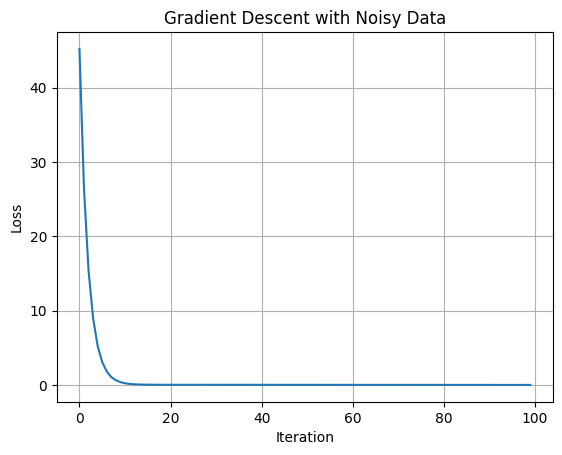

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Inputs
x = np.array([1.0, 2.0, 3.0, 4.0, 5.0])

# True target with small noise
y_true = np.array([2.0, 4.1, 6.0, 8.2, 10.1])  # not perfectly linear

# Initialize
w, b = 0.0, 0.0
learning_rate = 0.01
losses = []

# Gradient Descent loop
for i in range(100):
    y_pred = w * x + b
    loss = np.mean((y_pred - y_true)**2)
    losses.append(loss)
    
    # Gradients
    dw = 2 * np.mean((y_pred - y_true) * x)
    db = 2 * np.mean(y_pred - y_true)
    
    # Update
    w -= learning_rate * dw
    b -= learning_rate * db

print("Final weight:", w)
print("Final bias:", b)
print("Final loss:", losses[-1])
# Plot
plt.plot(losses)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Gradient Descent with Noisy Data")
plt.grid(True)
plt.show()


After running gradient descent on slightly noisy data, the weight and bias converged to approximately w ≈ 1.93 and b ≈ 0.37, producing a final loss ≈ 0.03.
This indicates that the neuron has learned the underlying pattern in the data but cannot perfectly predict every point due to noise.
The loss curve demonstrates gradual convergence, flattening near a nonzero value, which is typical in real-world training.

> In practice, convergence means the loss curve flattens at a minimum value, not necessarily zero. This flat minimum indicates the model parameters have stabilized.

# Key Takeaways from Day 6

1. **Optimizers** minimize loss by updating weights/biases  
2. **Gradient Descent** moves weights in direction opposite to gradient:  
   $$w := w - \eta \frac{\partial L}{\partial w}$$  
3. **Learning rate ($\eta$)** controls step size; must be tuned carefully  
4. Iterative updates gradually reduce loss → network learns  
5. Visualizing loss per iteration helps monitor training progress

---

<p style="text-align:center; font-size:18px;">
© 2025 Mostafizur Rahman
</p>
